In [107]:
import os
import pandas as pd
import cv2
import numpy as np
import PIL.Image as Image
from sklearn.cluster import KMeans

os.chdir('C:/Users/DELL/Desktop/Freelancing_DS/2/samples')

In [108]:
file_list=os.listdir(r"C:/Users/DELL/Desktop/Freelancing_DS/2/samples")

In [109]:
Name = file_list
len_name = len(Name)


In [110]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

In [111]:
R1, G1, B1, R2, G2, B2 = [], [], [], [], [], []
for i in range(len_name):
    print(i)
    img = Name[i]
    clusters = 2
    dc = DominantColors(img, clusters) 
    colors = dc.dominantColors()
    
    R1.append(int(colors[0][0]))
    G1.append(int(colors[0][1]))
    B1.append(int(colors[0][2]))
    R2.append(int(colors[1][0]))
    G2.append(int(colors[1][1]))
    B2.append(int(colors[1][2]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242


In [112]:
data = pd.DataFrame({'Name':Name,'R1':R1,'G1':G1,'B1':B1,'R2':R2,'G2':G2,'B2':B2})

In [113]:
data.shape

(243, 7)

In [114]:
data.head()

,Name,R1,G1,B1,R2,G2,B2
0,1.jpg,174,3,40,198,4,42
1,10.jpg,0,87,3,5,111,23
2,1001 edit.jpg,150,150,150,172,172,172
3,1001 original.jpg,215,203,158,203,187,143
4,1002 edit.jpg,164,165,157,148,147,139


In [115]:
data.to_csv('RGB_data.csv')

In [116]:
data = pd.read_csv("RGB_data.csv", index_col = 0)

In [132]:
img1 = 'C:/Users/DELL/Desktop/ex.jpeg'
clusters = 2
dc = DominantColors(img1, clusters) 
colors1 = dc.dominantColors()

In [133]:
colors1

array([[140, 133, 124],
       [ 95,  86,  77]])

In [119]:
dc = DominantColors('9.jpg', clusters) 
colors2 = dc.dominantColors()
colors2

array([[189,  54,  46],
       [142,  16,   8]])

In [120]:
dc = DominantColors('1.jpg', clusters) 
colors3 = dc.dominantColors()
colors3

array([[174,   3,  40],
       [198,   4,  42]])

In [134]:
b = 10
perc = 10
R1, R2, G1, G2, B1, B2 = colors1[0][0], colors1[1][0], colors1[0][1], colors1[1][1], colors1[0][2], colors1[1][2]
if ((R1 >= G1) & (R1 >= B1)):
    a, c = R1/(100/perc), R2/(100/perc)
    data1 = data[(data['R1']>=data['G1']) & (data['R1']>=data['B1'])]
    data2 = data1[((data1['R1']>(R1-a)) & (data1['R1']<(R1+a)) & (data1['G1']>(G1-b)) & (data1['G1']<(G1+b)) & (data1['B1']>(B1-b)) & (data1['B1']<(B1+b)))
                  |((data1['R2']>(R2-c)) & (data1['R2']<(R2+c)) & (data1['G2']>(G2-b)) & (data1['G2']<(G2+b)) & (data1['B2']>(B2-b)) & (data1['B2']<(B2+b)))
                  |((data1['R1']>(R2-c)) & (data1['R1']<(R2+c)) & (data1['G1']>(G2-b)) & (data1['G1']<(G2+b)) & (data1['B1']>(B2-b)) & (data1['B1']<(B2+b)))
                  |((data1['R2']>(R1-a)) & (data1['R2']<(R1+a)) & (data1['G2']>(G1-b)) & (data1['G2']<(G1+b)) & (data1['B2']>(B1-b)) & (data1['B2']<(B1+b)))]
    
elif (G1 >= R1 & G1 >= B1):
    a, c = G1/(100/perc), G2/(100/perc)
    data1 = data[(data['G1']>=data['R1']) & (data['G1']>=data['B1'])]
    data2 = data1[((data1['R1']>(R1-b)) & (data1['R1']<(R1+b)) & (data1['G1']>(G1-a)) & (data1['G1']<(G1+a)) & (data1['B1']>(B1-b)) & (data1['B1']<(B1+b)))
                  |((data1['R2']>(R2-b)) & (data1['R2']<(R2+b)) & (data1['G2']>(G2-c)) & (data1['G2']<(G2+c)) & (data1['B2']>(B2-b)) & (data1['B2']<(B2+b)))
                  |((data1['R1']>(R2-b)) & (data1['R1']<(R2+b)) & (data1['G1']>(G2-c)) & (data1['G1']<(G2+c)) & (data1['B1']>(B2-b)) & (data1['B1']<(B2+b)))
                  |((data1['R2']>(R1-b)) & (data1['R2']<(R1+b)) & (data1['G2']>(G1-a)) & (data1['G2']<(G1+a)) & (data1['B2']>(B1-b)) & (data1['B2']<(B1+b)))]
    
else:
    a, c = colors1[0][2]/(100/perc), colors1[1][2]/(100/perc)
    data1 = data[(data['B1']>=data['R1']) & (data['B1']>=data['G1'])]
    data2 = data1[((data1['R1']>(R1-b)) & (data1['R1']<(R1+b)) & (data1['G1']>(G1-b)) & (data1['G1']<(G1+b)) & (data1['B1']>(B1-a)) & (data1['B1']<(B1+a)))
                  |((data1['R2']>(R2-b)) & (data1['R2']<(R2+b)) & (data1['G2']>(G2-b)) & (data1['G2']<(G2+b)) & (data1['B2']>(B2-c)) & (data1['B2']<(B2+c)))
                  |((data1['R1']>(R2-b)) & (data1['R1']<(R2+b)) & (data1['G1']>(G2-b)) & (data1['G1']<(G2+b)) & (data1['B1']>(B2-c)) & (data1['B1']<(B2+c)))
                  |((data1['R2']>(R1-b)) & (data1['R2']<(R1+b)) & (data1['G2']>(G1-b)) & (data1['G2']<(G1+b)) & (data1['B2']>(B1-a)) & (data1['B2']<(B1+a)))]
    

In [135]:
data2

,Name,R1,G1,B1,R2,G2,B2
27,1013 orignal.jpg,144,130,117,129,115,101
42,13.jpg,131,127,111,96,90,77
107,2031 edit.jpg,130,129,126,101,100,98
109,2032 edit.jpg,130,121,101,144,138,123
111,2033 edit.jpg,130,121,101,145,138,123
114,2036 orignal.jpg,88,80,69,29,23,19
115,2037 edit.jpg,67,63,54,93,91,80
179,38.jpg,47,37,22,91,83,68
181,4.jpg,52,35,21,97,86,75
190,6001 edit.jpg,88,80,68,149,143,134


In [136]:
data.shape

(243, 7)

In [137]:
data2.shape

(16, 7)

In [138]:
nam = data2.Name.tolist()

In [139]:
match = []
img2 = cv2.imread(img1,cv2.COLOR_BGR2RGB)
for i in range(len(nam)):
    img3 = cv2.imread(nam[i],cv2.COLOR_BGR2RGB)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(img3,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
    if(keypoints_1 == 0 or keypoints_2 ==0 or descriptors_1 is None or descriptors_2 is None):
        match.append(90)
        continue
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)
    matching_perc = (2*len(matches))/(len(keypoints_1)+len(keypoints_2))
    match.append(matching_perc*100)
   

In [140]:
match

[0.027466868090365994,
 28.10484709798211,
 1.167684996605567,
 0.027466868090365994,
 0.027466868090365994,
 9.607505492547947,
 2.961168315499024,
 5.140873280811857,
 0.16468812186921017,
 38.596644149052075,
 7.3244631800816755,
 36.3729718628055,
 7.04392560348239,
 0.0686530275985171,
 0.5341002465078061,
 2.022670196158284]

In [141]:
length = len(nam)

In [147]:
new_list = []
match_perc = 20
for i in range(length):
    if(match[i]>match_perc):
        new_list.append(nam[i])

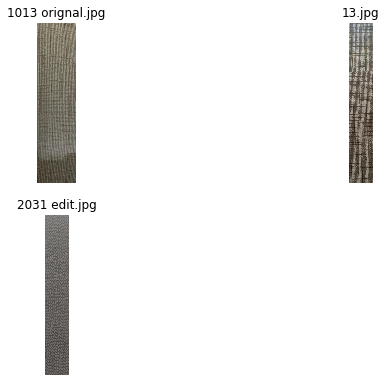

In [148]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 70))
rows = 20
columns = 2
if(len(new_list)>0):
    for i in range(len(new_list)):
        fig.add_subplot(rows, columns, i+1)
        img2 = cv2.imread(new_list[i])
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(nam[i])
else:
    for i in range(len(nam)):
        fig.add_subplot(rows, columns, i+1)
        img2 = cv2.imread(nam[i])
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(nam[i])
